Example: Integration for obtaining energy dissipation from gravitational radiation

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.ticker as mticker


plt.rcParams['figure.figsize'] = (20.0, 10.0)

datadir = "/Users/jcom/ETK/ID_data_ETK/plotting_scripts/plots/"


#constants
G = 6.673e-11       # m^3/(kg s^2)
c = 299792458       # m/s
M_sol = 1.98892e30  # kg
# convertion factors
M_to_ms = 1./(1000*M_sol*G/(c*c*c))
M_to_density = c**5 / (G**3 * M_sol**2) # kg/m^3

# Plot info 
fontsize  = 14
linewidth = 1
rc('text', usetex=True)
rc('font', family='serif')
rc('font', serif='palatino')
#rc('font', weight='bolder')
rc('mathtext', default='sf')
rc("lines", markeredgewidth=1)
rc("lines", linewidth=linewidth)
rc('axes', labelsize=fontsize+3)
rc("axes", linewidth=(linewidth+1)//2)
rc('xtick', labelsize=fontsize)
rc('ytick', labelsize=fontsize)
rc('legend', fontsize=fontsize)
rc('xtick.major', pad=8)
rc('ytick.major', pad=8)


def apply_second_xaxis(ax):
    ax2 = ax.twiny()
    ax2.set_xlabel(r't [ms]')
    ax2.set_xlim((ax.get_xlim()[0] / M_to_ms, ax.get_xlim()[1] / M_to_ms))
    ax2.xaxis.set_major_locator(mticker.MaxNLocator(7))
    ax2.xaxis.set_minor_locator(mticker.MaxNLocator(14))



First we study a perturbation, and how the star changes during the perturbation: 

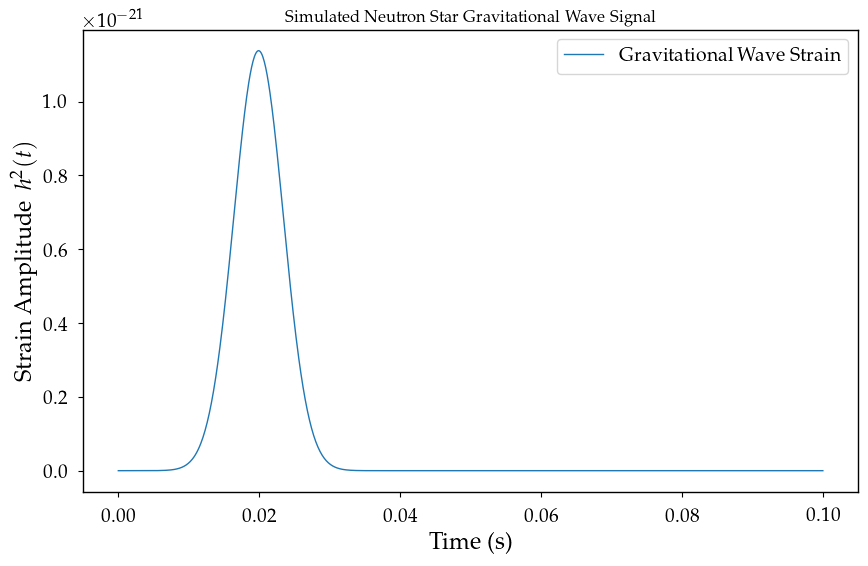

Total Radiated Energy: 8.05e-45 J
Integration Error Estimate: 1.20e-44 J


In [6]:


def neutron_star_strain(t, T):
    """
    Simulate a realistic neutron star gravitational wave signal
    
    Parameters:
    - t: time 
    - T: total signal duration
    
    Physical considerations:
    - Rapid initial rise (sudden deformation)
    - Exponential decay (energy dissipation)
    - Possible oscillatory component
    """
    # Initial rapid rise
    rise_factor = np.exp(-((t - 0.2*T)**2) / (0.05*T)**2)
    
    # Exponential decay
    decay_factor = np.exp(-(t/T))
    
    # Oscillatory component to represent internal dynamics
    oscillation = np.sin(2*np.pi*t/T) * np.exp(-(t/T))
    
    return 1e-21 * rise_factor * decay_factor * (1 + 0.5 * oscillation)

# Numerical Integration Approach
def calculate_radiated_energy(T, num_points=200):
    """
    Calculate total energy using Gauss-Legendre quadrature
    
    Parameters:
    - T: total signal duration
    - num_points: number of quadrature points
    """
    # Import scipy for specialized numerical methods
    from scipy.integrate import quad
    
    def integrand(t):
        """Function to integrate: h²(t)"""
        return neutron_star_strain(t, T)**2
    
    # Perform Gauss-Legendre quadrature
    energy, error = quad(integrand, 0, T)
    
    return energy, error

# Physical Parameters
total_duration = 0.1  # seconds (typical for neutron star event)
radiated_energy, integration_error = calculate_radiated_energy(total_duration)

# Visualization
t = np.linspace(0, total_duration, 1000)
strain = [neutron_star_strain(ti, total_duration) for ti in t]

plt.figure(figsize=(10,6))
plt.plot(t, strain, label='Gravitational Wave Strain')
plt.title('Simulated Neutron Star Gravitational Wave Signal')
plt.xlabel('Time (s)')
plt.ylabel(r'Strain Amplitude  $\,h^2(t)$')
plt.legend()
plt.show()

print(f"Total Radiated Energy: {radiated_energy:.2e} J")
print(f"Integration Error Estimate: {integration_error:.2e} J")

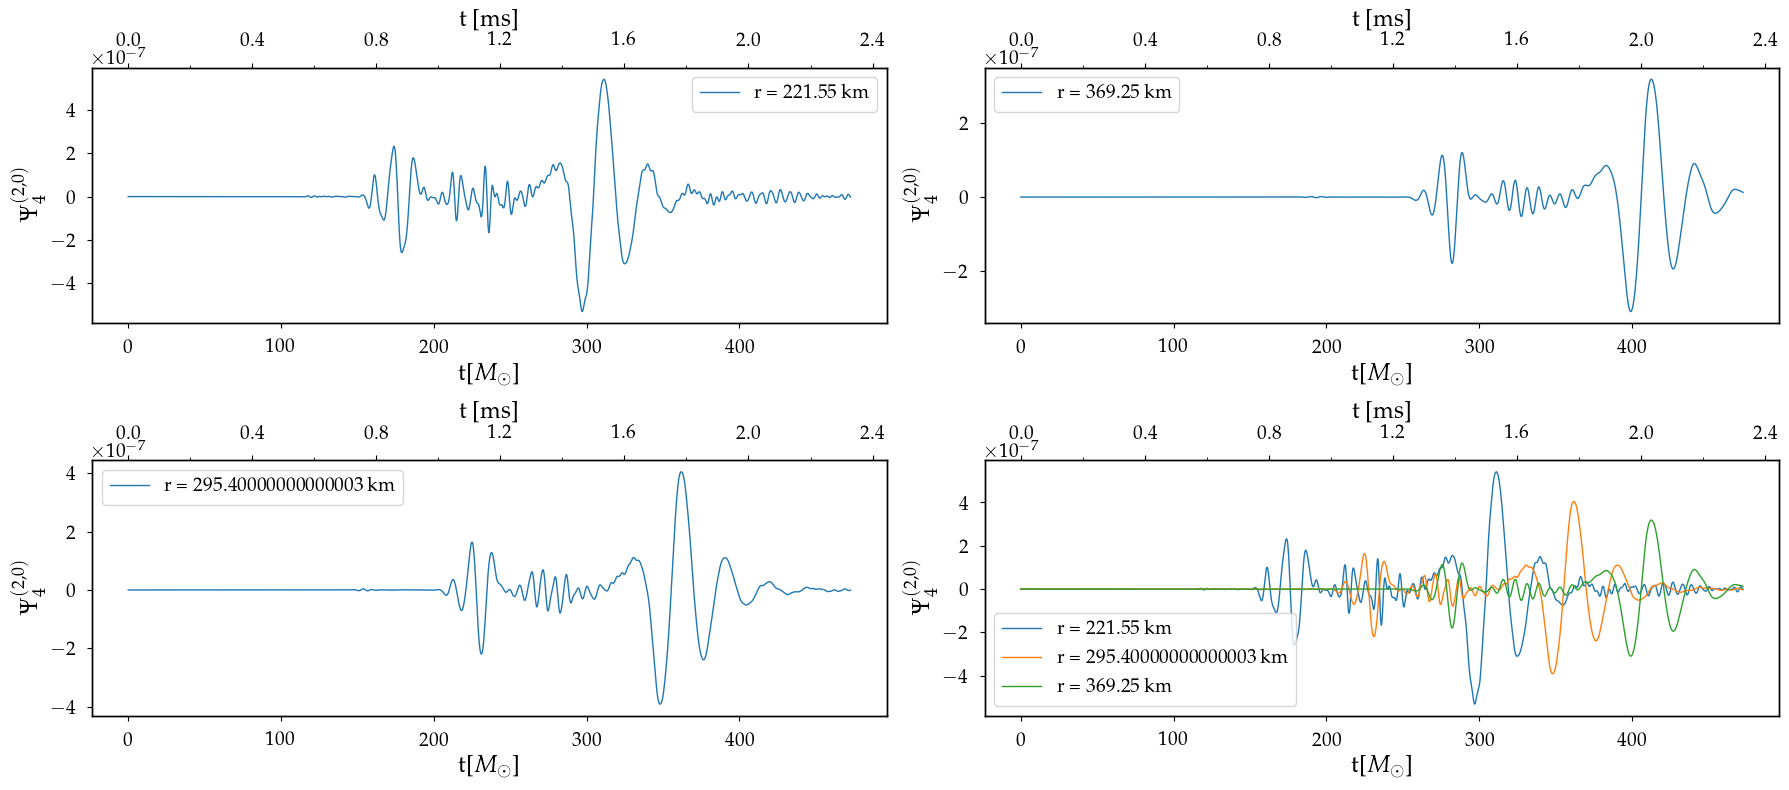

In [47]:
radii = [150,200,250]
titles = [f"r = {radii[0]*1.477} km", f"r = {radii[1]*1.477} km", f"r = {radii[2]*1.477} km", "All"]



fig, axs = plt.subplots(2, 2, figsize=(18, 8))


dataGW = np.loadtxt(f'{datadir}DEF9_ax95_gwcoll_new_Psi4_l2_m0_r150.0.txt', skiprows=1,dtype=np.float64)
axs[0][0].plot(dataGW[:,0],dataGW[:,1],label=f'{titles[0]}')
axs[1][1].plot(dataGW[:,0],dataGW[:,1],label=f'{titles[0]}')


dataGW = np.loadtxt(f'{datadir}DEF9_ax95_gwcoll_new_Psi4_l2_m0_r200.0.txt', skiprows=1,dtype=np.float64)
axs[1][0].plot(dataGW[:,0],dataGW[:,1],label=f'{titles[1]}')
axs[1][1].plot(dataGW[:,0],dataGW[:,1],label=f'{titles[1]}')

dataGW = np.loadtxt(f'{datadir}DEF9_ax95_gwcoll_new_Psi4_l2_m0_r250.0.txt', skiprows=1,dtype=np.float64)
axs[0][1].plot(dataGW[:,0],dataGW[:,1],label=f'{titles[2]}')
axs[1][1].plot(dataGW[:,0],dataGW[:,1],label=f'{titles[2]}')

# Loop through each axis and title
for ax, title in zip(axs.flat, titles):  # Flatten the 2D array and iterate
    apply_second_xaxis(ax)  # Apply the function
    ax.legend()             # Add a legend
    ax.set_ylabel(r'$\Psi_4^{(2,0)}$')     # Set the title
    ax.set_xlabel(r't[$M_\odot$]')
plt.tight_layout()
plt.show()

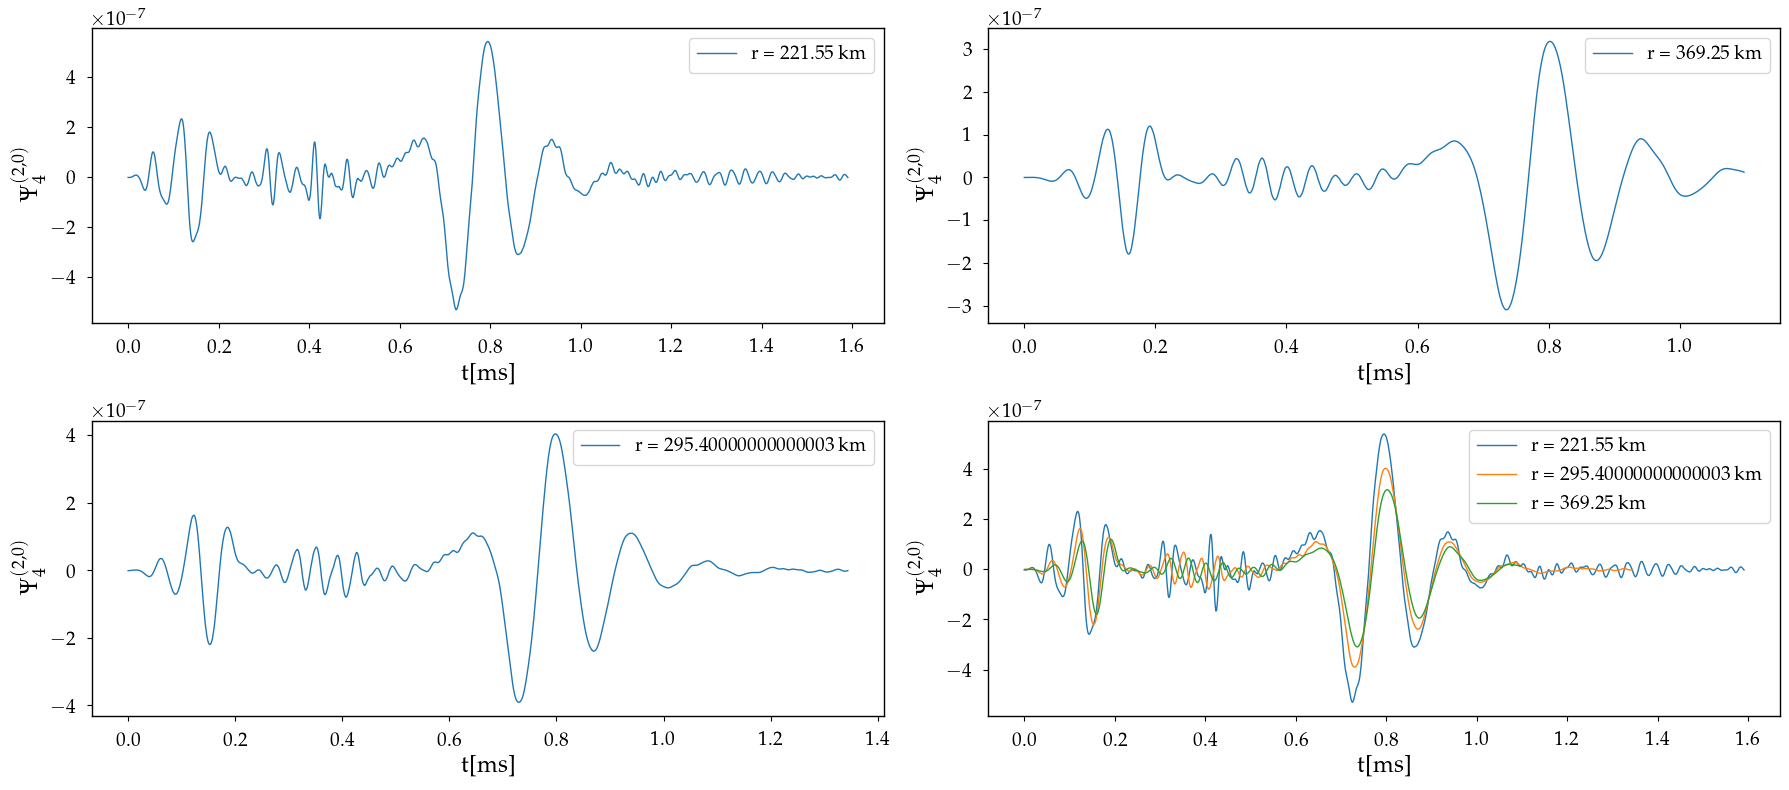

In [45]:

def ret_filter(dataf,i):
    t     = dataf[:,0] 
    psi4  = dataf[:,1]
    t_ret = t-radii[i]

    r_filter  = t_ret>=0
    t_ret_new = t_ret[r_filter]/M_to_ms
    psi4_new  = psi4[r_filter]
    return t_ret_new, psi4_new


radii = [150,200,250]  # Extraction radii
titles = [f"r = {radii[0]*1.477} km", f"r = {radii[1]*1.477} km", f"r = {radii[2]*1.477} km", "All"]

fig, axs = plt.subplots(2, 2, figsize=(18, 8))

dataGW = np.loadtxt(f'{datadir}DEF9_ax95_gwcoll_new_Psi4_l2_m0_r150.0.txt', skiprows=1,dtype=np.float64)

t_ret, psi4 = ret_filter(dataGW,0)

axs[0][0].plot(t_ret,psi4,label=f'{titles[0]}')
axs[1][1].plot(t_ret,psi4,label=f'{titles[0]}')

dataGW = np.loadtxt(f'{datadir}DEF9_ax95_gwcoll_new_Psi4_l2_m0_r200.0.txt', skiprows=1,dtype=np.float64)

t_ret, psi4 = ret_filter(dataGW,1)
axs[1][0].plot(t_ret,psi4,label=f'{titles[1]}')
axs[1][1].plot(t_ret,psi4,label=f'{titles[1]}')

dataGW = np.loadtxt(f'{datadir}DEF9_ax95_gwcoll_new_Psi4_l2_m0_r250.0.txt', skiprows=1,dtype=np.float64)
t_ret, psi4 = ret_filter(dataGW,2)
axs[0][1].plot(t_ret,psi4,label=f'{titles[2]}')
axs[1][1].plot(t_ret,psi4,label=f'{titles[2]}')

# Loop through each axis and title
for ax, title in zip(axs.flat, titles):  # Flatten the 2D array and iterate
    #apply_second_xaxis(ax)  # Apply the function
    ax.legend()             # Add a legend
    ax.set_ylabel(r'$\Psi_4^{(2,0)}$')     # Set the title
    ax.set_xlabel('t[ms]')
plt.tight_layout()
plt.show()

#  your results : 